## Matricule & noms : 
`David-Olivier Roy - xxx`
  
`Amine Melbouci    - xxx`  
  
`Marc-Antoine Huet - xxx`

### <center> ELE8812 - Traitement et analyse d'images </center>
<center> Travail practique No. 1 </center>
<center>Hiver 2021 </center>

<div class="alert alert-block alert-danger">
Ce <a href="https://realpython.com/matlab-vs-python/"> lien</a> vous permettra de voir les différences fondamentales entre Python et Matlab. Ne passez pas forcement par les étapes d'installation.
</div>

L’objet de ce travail est de mettre en pratique certains des traitements élémentaires dans le domaine spatial qui ont été présentés en cours, tout en permettant une familiarisation avec Python et ses outils de traitement d’images. Trois points seront abordés :
1. Les transformations géométriques
2. Le débruitage par filtrage dans le domaine spatial
3. L’amélioration d’images par manipulation d’histogramme et masque flou

Les fonctions et les données à utiliser pour effectuer ce travail pratique se trouvent
dans l’archive ZIP de ce TP disponible sur le site web du cours. 

**Pondération**
- Transformations géométriques : 6 pts
- Débruitage par filtrage spatial : 6 pts
- Amélioration d’images : 6 pts
- Qualités de la langue et du rapport : 2 pts
- Total : 20 points

**Date de remise**
- Groupe 1: 14 février 23h59
- Groupe 2: 21 février 23h59

##  1. Transformations géométriques (6 pts)

L’interpolation est un élément central de toute transformation géométrique d’image.
L’objet de cette question est de mettre en œuvre une forme élémentaire d’interpolation et
de l’utiliser dans une transformation géométrique particulièrement simple : le changement
d’échelle d’une image à l’aide d’une interpolation par plus proche voisin.
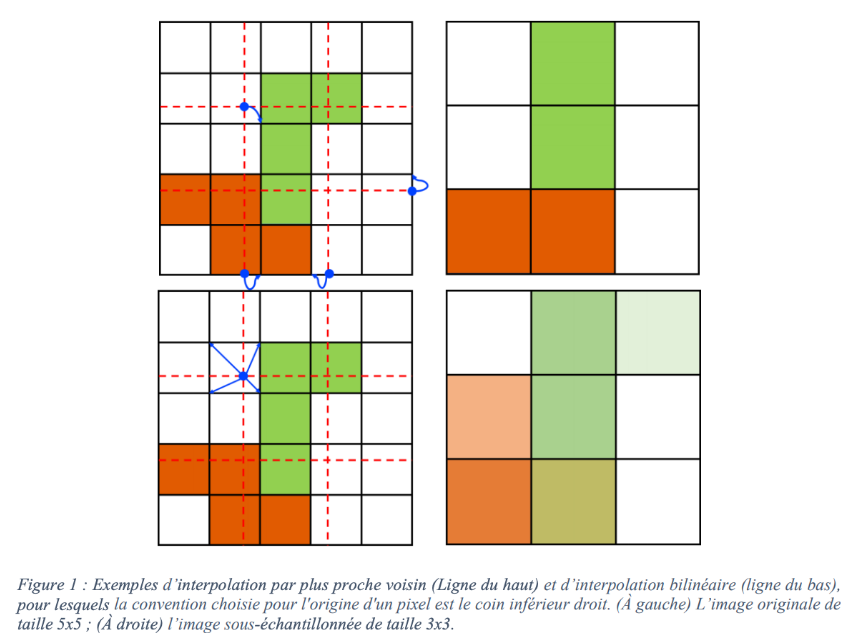

<div class="alert alert-block alert-info">


La cellule ci dessous effectue des <code>import</code> cela s'assimile a un<code>addpath</code> en matlab. Le but est d'amener des fonctions extérieures (packages) dans le notebook afin que Python les reconnaisse.  
<code> import package as pkg</code> permet de raccourcir le nom de ce dernier. Les fonctions contenues dans 'package' seront alors appelées ainsi <code>pkg.function()</code><br>
    
Vous pouvez chercher sur google chacun des package appelés ci-dessous afin d'obtenir leur documentation.<br>

N'oubliez pas de relancer cette cellule si jamais vous redemarrez le Kernel !!
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
%matplotlib inline
import cv2
import numpy as np
plt.rcParams["figure.figsize"] = (12, 10)


### 1.1. Fonction de changement d’échelle (3 pts)
<div class="alert alert-block alert-warning">
Développez une fonction définie comme suit. <br>

- Indiquez la manière dont vous définissez les coordonnées de l’origine de chaque pixel d’une image (ex : au centre du pixel, dans le coin supérieur gauche …)

- Décrivez chacune des étapes vous permettant de passer de l’image im à l’image ims.

<b>Remarque</b> : Dans la fonction mae_ppv que vous développerez, vous ne devez pas utiliser
les fonctions d’interpolation existantes. Par contre, vous pouvez vous inspirer de la fonction mae_bil.m qui implémente une interpolation bilinéaire.
    </div>

In [105]:
# Inscrivez votre code ici
# Compléter la fonction suivante faisant de l'interpolation par plus proche voisin.
def mae_ppv(im, sc):
    """ Interpolation par plus proche voisin d'une image im.
    im (nd.array): Image à interpoler.
    sc (float): Facteur d'échelle.
    
    Return:
        nd.array: Image interporlée.
    """
    
    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return
    

    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return

    M, N = im.shape

    # Nouvelles dimensions de l'image
    Ms, Ns = [round(M * sc), round(N * sc)]

    xs = np.linspace(1, Ms, Ms)
    ys = np.linspace(1, Ns, Ns)

    xsp = xs * M / Ms
    ysp = ys * N / Ns
    
    # Ajouter un pixel autour car il faut interpoler les pixels sur les bords
    Ap = np.pad(im, 1, 'symmetric')
    
    # Extraire les nouvelles coordonnées de l'image
    xisp = np.round(xs * M / Ms).astype(int)
    yisp = np.round(ys * N / Ns).astype(int)


    # Interpolation par plus proche voisin
    ims = Ap[xisp, :][:, yisp]
    
    return ims

In [106]:
def mae_bil(im, sc):
    """ Interpolation bilinéaire d'une image im.
    im (nd.array): Image à interpoler.
    sc (float): Facteur d'échelle.
    
    Return:
        nd.array: Image interporlée.
    """
    
    if sc <= 0 :
        display('scale : le parametre d echelle doit etre > 0')
        return
    

    if np.ndim(im) != 2 :
        display('Image doit avoir 2 dimensions')
        return

    M, N = im.shape

    # Nouvelles dimensions de l'image
    Ms, Ns = [round(M * sc), round(N * sc)]

    xs = np.linspace(1, Ms, Ms)
    ys = np.linspace(1, Ns, Ns)

    xsp = xs * M / Ms
    ysp = ys * N / Ns
    
    # Ajouter un pixel autour car il faut interpoler les pixels sur les bords
    Ap = np.pad(im, 1, 'symmetric')
    
    # Extraire les nouvelles coordonnées de l'image
    xisp = np.floor(xs * M / Ms).astype(int)
    yisp = np.floor(ys * N / Ns).astype(int)
    
    [Xsp, Ysp] = np.meshgrid(xsp,ysp)
    Xsp = np.transpose(Xsp)
    Ysp = np.transpose(Ysp)

    Xfsp = Xsp - np.floor(Xsp) # Coefficients pour l'interpolation
    Yfsp = Ysp - np.floor(Ysp)  

    # Interpolation bilinéaire
    ims = (1 - Xfsp) * (1 - Yfsp) * Ap[xisp, :][:, yisp] + \
          Xfsp * (1-Yfsp) * Ap[xisp + 1, :][:, yisp] + \
          (1 - Xfsp) * Yfsp * Ap[xisp, :][:, yisp + 1] + \
          Xfsp * Yfsp * Ap[xisp + 1, :][:, yisp + 1]
    
    return ims

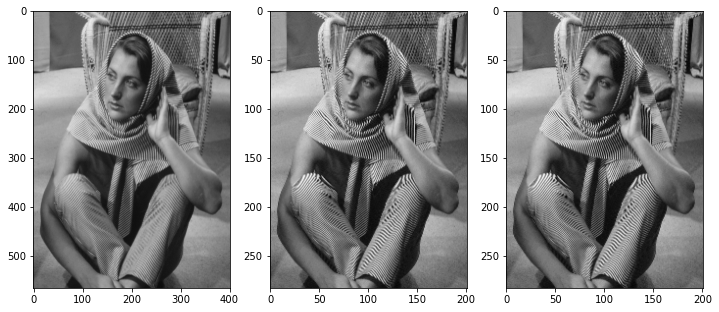

In [107]:
img=plt.imread('Barbara.tif')
#plt.imshow(img, cmap='gray')

imgVoisin=mae_ppv(img, 0.5)
imgBil=mae_bil(img, 0.5)

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(imgVoisin, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(imgBil, cmap='gray')

### 1.2. Effet de l’interpolation (3 pts)
<div class="alert alert-block alert-warning">

- Pour mettre en évidence l’effet de l’interpolation, utilisez la fonction que vous avez
développée pour changer l’échelle de l’image Barbara.tif d’un facteur α
inférieur à 1. Utilisez ensuite la même fonction et un facteur de 1/ α pour la ramener
l’image transformée à son échelle initiale.
  </div>

Text(0.5, 1.0, 'Reconstruite')

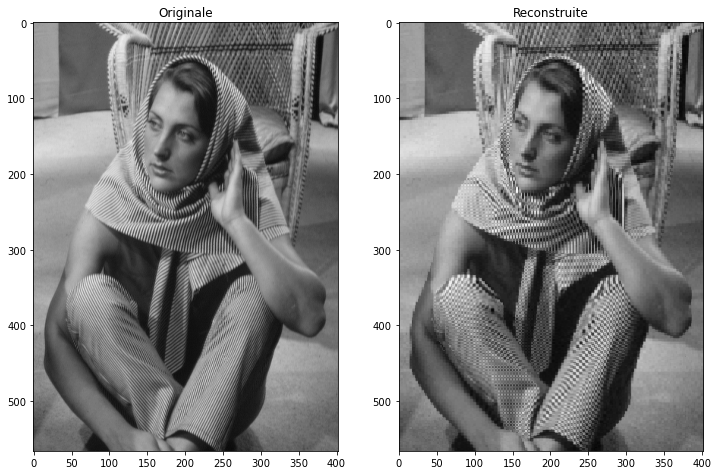

In [108]:
img=plt.imread('Barbara.tif')
alpha = 0.5

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Originale")

imgVoisin1=mae_ppv(img, alpha)

plt.subplot(1,2,2)
imgVoisin=mae_ppv(imgVoisin1, 1/alpha)
plt.imshow(imgVoisin, cmap='gray')
plt.title("Reconstruite")


<div class="alert alert-block alert-warning">


- Effectuez les mêmes opérations avec la fonction mae_bil,
qui utilise une interpolation bilinéaire.
  </div>

Text(0.5, 1.0, 'Reconstruite')

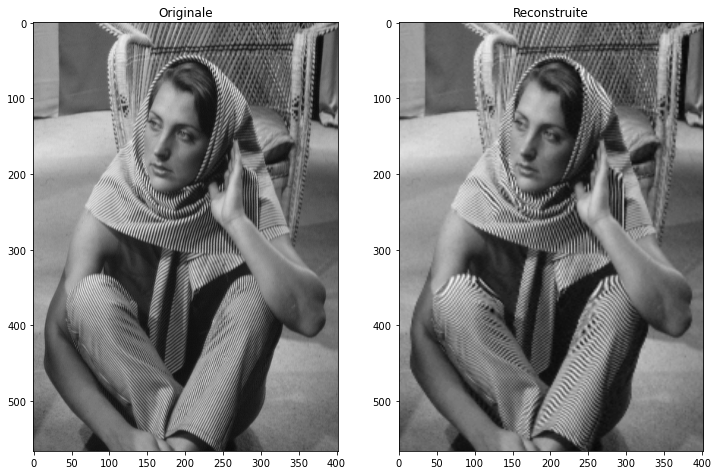

In [109]:
img=plt.imread('Barbara.tif')
alpha = 0.5

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Originale")

imgBil1=mae_bil(img, alpha)

plt.subplot(1,2,2)
imgBil=mae_bil(imgBil1, 1/alpha)
plt.imshow(imgBil, cmap='gray')
plt.title("Reconstruite")


<div class="alert alert-block alert-warning">

- Qu’observez-vous ? Est-ce que les deux schémas d’interpolation permettent de
reproduire fidèlement l’image originale ? À quoi sont dues les différences
observées ? Pour répondre à cette question, vous pouvez calculer l’erreur
quadratique moyenne entre les images.

\begin{equation*}
\Delta Q = \frac 1 n  \sum_{i,j}\left( I \left( i,j \right) - I' \left( i,j \right) \right)^2
\end{equation*}


Où n est le nombre de pixel dans l’image, 𝐼(𝑖,𝑗) est un pixel de l’image original et
𝐼’(𝑖,𝑗) est le pixel correspondant dans l’image transformée. Vous pouvez aussi
observer l’histogramme des différences d’intensité entre les images.

 </div>


In [116]:
x, y = imgVoisin.shape
n = x*y  # Nb de pixels
print("Nombre de pixels: ", n)
print("\n")
print("Erreur quadratique moyenne")

Qvoisin = (1/n)*(np.sum((img.astype("float")-imgVoisin.astype("float"))**2))
print("Plus proche voisin: %.2f" % Qvoisin)

Qbil = (1/n)*(np.sum((img.astype("float")-imgBil.astype("float"))**2))
print("Bilinéaire: %.2f" % Qbil)


Nombre de pixels:  227532


Erreur quadratique moyenne
Plus proche voisin: 450.27
Bilinéaire: 258.88


<div class="alert alert-block alert-success"> 
Évidement, l'interpolation par plus proche voisin apporte une plus grande erreur quadratique moyenne entre l'image originale et celle transformée que l'interpolation bilinéaire. Leur mesures sont respectivement 450,26 et 258,88 pour un facteur α de 0,5. L'interpolation par plus proche voisin donne une image qui semble être beaucoup moins nette comparativement à son homologue. En réduisant la taille de l'image, une partie de l'information a été perdu. Or, en essayant de reproduire l'image originale, certains artéfacts viennent réduire la qualité de cette reconstruction.

<div class="alert alert-block alert-warning">
- Quels artefacts (défauts) observez-vous dans les images réduites et reconstruites ?
    </div>

<div class="alert alert-block alert-success"> 
L'interpolation par plus proche voisin donne une image moins lisse. Son image reconstruite semble pixelisé.
  
L'interpolation bilinéaire donne une image plus floue.



## 2. Débruitage par filtrage spatial (6 pts)
<div class="alert alert-block alert-warning">


Le fichier IRM_genou.tif de l’archive TP1.zip contient l’image d’un genou obtenue
en imagerie par résonance magnétique nucléaire (IRM). Cette image est dégradée par un
bruit relativement important. Le but de cette question est de mettre en œuvre et de comparer
plusieurs filtres spatiaux, linéaires ou non. Développez et mettez en œuvre les filtres
suivants :

- Moyennage simple sur un masque carré de côté 3, 5 ou 7 pixels.
- Moyennage pondéré de type gaussien sur un masque carré de côté 3, 5 ou 7 pixels.
- Filtrage médian sur un masque carré de côté 3, 5 ou 7 pixels.

La librairie OpenCV vous permet d'appliquer ces filtres (voir [documentation](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)). L’image filtrée doit être de même type et avoir la même taille que l’image de départ.
Comparez empiriquement les résultats, en vous basant notamment sur le bruit résiduel, sur
la netteté des contours des images filtrées et sur l’erreur quadratique moyenne. Vous
pouvez au besoin vous appuyer sur leur histogramme. Le bruit résiduel Ο(𝑥, 𝑦) peut être
calculé en soustrayant l’image filtrée 𝐼′(𝑥, 𝑦) à l’image originale 𝐼(𝑥, 𝑦).

\begin{equation*}
Ο(𝑥, 𝑦) = |𝐼(𝑥, 𝑦) − 𝐼′(𝑥, 𝑦)|
\end{equation*}


Discutez de l’effet du type de filtre (moyenne simple, moyenne pondérée, médian) et de la
taille du filtre (3, 5, ou 7 pixels) sur les résultats de débruitage. 
    </div>

In [8]:
# Importer l'image
img = cv2.imread('IRM_genou.tif')

# Filtres
cote = 3
simple = cv2.blur(img,(cote,cote))
gaus = cv2.GaussianBlur(img,(cote,cote),0)
median = cv2.medianBlur(img,cote)

(([], []), ([], []))

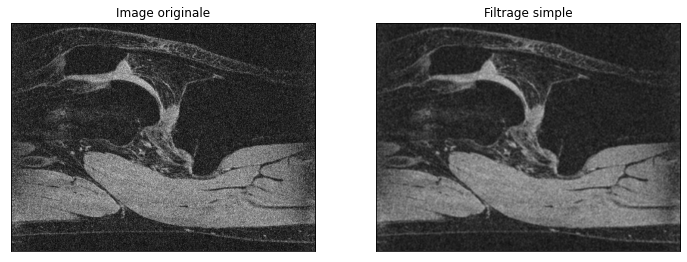

In [9]:
# Filtrage simple
plt.subplot(221), plt.imshow(img), plt.title('Image originale')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(simple),plt.title('Filtrage simple')
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

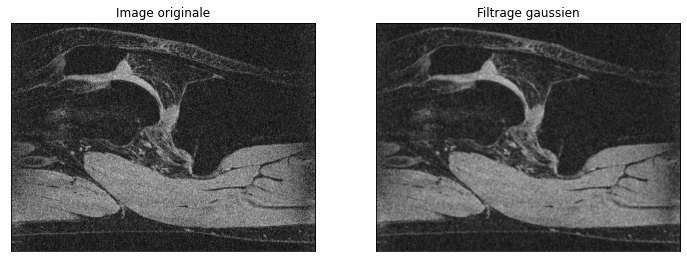

In [10]:
plt.subplot(221),plt.imshow(img),plt.title('Image originale')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(gaus),plt.title('Filtrage gaussien')
plt.xticks([]), plt.yticks([])

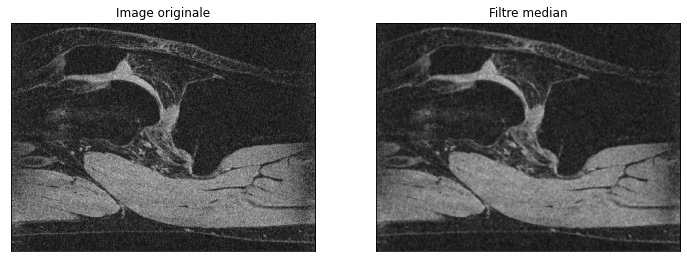

In [11]:
plt.subplot(221),plt.imshow(img),plt.title('Image originale')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(median),plt.title('Filtre median')
plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
# Comparatif

# Bruit résiduel
print("Bruit résiduel")
Osimp = np.sum(abs(img-simple))
print("simple:   ", Osimp)

Ogaus = np.sum(abs(img-gaus))
print("gaussien: ", Ogaus)

Omedian = np.sum(abs(img-median))
print("median:   ", Omedian)
print('\n')


# Erreur quadratique moyenne
n = float(img.shape[0]*img.shape[1])
print("Erreur quadratique moyenne")
Qsimp = (1/n)*(np.sum((img.astype("float")-simple.astype("float"))**2))
print("simple:   %.1f" % Qsimp)

Qgaus = (1/n)*(np.sum((img.astype("float")-gaus.astype("float"))**2))
print("gaussien:  %.1f" % Qgaus)

Qmedian = (1/n)*(np.sum((img.astype("float")-median.astype("float"))**2))
print("median:   %.1f" % Qmedian)


Bruit résiduel
simple:    77257746
gaussien:  77039472
median:    65303664


Erreur quadratique moyenne
simple:   1072.3
gaussien:  742.5
median:   1117.5


<div class="alert alert-block alert-success"> 
Plus la taille du filtre est grande, plus l'image filtrée est floue, car le calcul est fait sur un plus grand voisinage de pixels. Plus l'image est floue et plus le bruit diminuera, ce qui correspond à un haut bruit résiduel et une grande erreur quadratique moyenne. Donc, plus la taille du filtre augmente, plus ces 2 métriques augmentent. Le filtrage simple est celui produisant les contours les plus flous, puisque c'est une simple moyenne. Le filtre gaussien et médian donnent un résultat visuel assez semblable. Par contre, on voit que l'erreur quadratique moyenne du filtre gaussien est toujours la plus faible des 3, ce qui signifie probablement que beaucoup de pixels bruités sont remplacés par des pixels d'une valeur légèrement plus élevée ou plus faible. Pour les 2 autres filtres, l'écart de correction est probablement plus grand.

## 3. Amélioration d’images (6 pts)

Le fichier Lune.tif contient une image de la lune de qualité médiocre, tant du point de
vue de la distribution des niveaux de gris que de la netteté. Le but de cette question est
donc d’appliquer une succession de traitements pour améliorer la qualité de cette image.

### 3.1. Transformations portant sur l’intensité (2 pts)
<div class="alert alert-block alert-warning">

En vous basant sur l’histogramme, effectuez une ou plusieurs transformations portant sur
l’intensité de l’image pour en améliorer le contraste et l’aspect visuel. Quelques
transformations que vous pouvez essayer pour améliorer le contraste sont :

| Transformation | Paramètre(s) | Équation |
| --- | --- | --- |
| Inversion | NA | 1 – 𝑟 |
|Gamma |   𝛾 < 1 si sous-exposé <br/> 𝛾 > 1 si surexposé | 𝑟<sup>𝛾</sup> |
| Logarithme | NA | ln(1 + 𝑟) /ln(2) |
| Exponentielle | NA | 𝑒<sup>𝑟𝑙𝑛(2)</sup> − 1|

<center> ** r correspond à la valeur d’un pixel dans l’image </center>

<b>Note</b> : Il n’est pas conseillé de procéder à l’égalisation de l’histogramme à cette étape-ci.
Expliquez votre choix de transformation que vous avez utilisé pour améliorer l’aspect
visuel de l’image.

</div>

In [94]:
imageOrig = cv2.imread("Lune.tif", cv2.IMREAD_GRAYSCALE)
imageOrig = imageOrig/255.0

# Graphiques des effets individuels
def plotGraphsHist(image1=None, image2=None, figsize=(12,10)):
    image1 = (image1*255).astype("uint8")
    image2 = (image2*255).astype("uint8")
    figure, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    axs[0,0].imshow(image1, cmap="gray", vmin=0, vmax=255)
    axs[0,0].set_title("Image originale")
    axs[0,1].imshow(image2, cmap="gray", vmin=0, vmax=255)
    axs[0,1].set_title("Image transformée")
    axs[1,0].hist(image1.ravel(),256,[0,256])
    axs[1,0].set_title("Histogramme image originale")
    axs[1,0].set_ylim([0,10000])
    axs[1,1].hist(image2.ravel(),256,[0,256])
    axs[1,1].set_title("Histogramme image transformée")
    axs[1,1].set_ylim([0,10000])
    axs[0,0].get_xaxis().set_visible(False)
    axs[0,0].get_yaxis().set_visible(False)
    axs[0,1].get_xaxis().set_visible(False)
    axs[0,1].get_yaxis().set_visible(False)
    
def plotGraphs(image1=None, image2=None):
    image1 = (image1*255).astype("uint8")
    image2 = (image2*255).astype("uint8")
    figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,10))
    ax1.imshow(image1, cmap="gray", vmin=0, vmax=255)
    ax1.set_title("Image originale")
    ax2.imshow(image2, cmap="gray", vmin=0, vmax=255)
    ax2.set_title("Image transformée")
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    
def inversionOp(image):
    return 1-image

def gammaOp(image, gamma):
    return image ** gamma

def logarithmeOp(image):
    return np.log(1+image)/np.log(2)

def exponentielleOp(image):
    return np.exp(image * np.log(2)) - 1

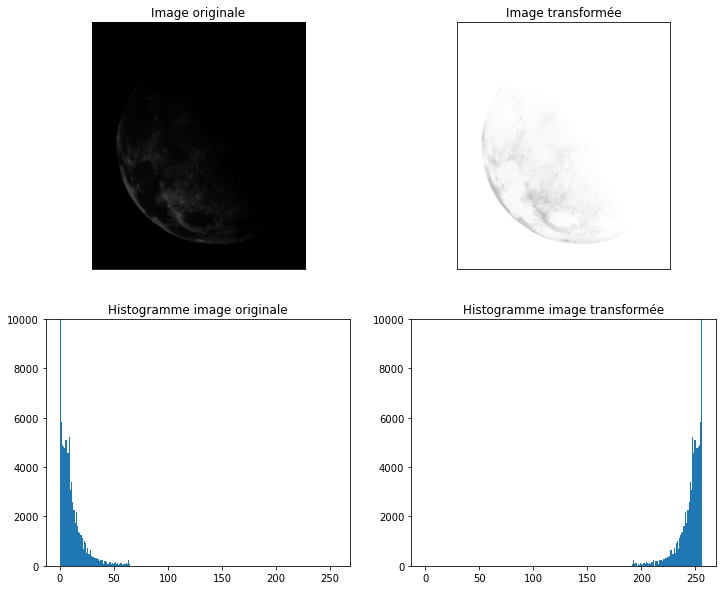

In [82]:
# Inversion
plotGraphsHist(imageOrig, inversionOp(imageOrig))

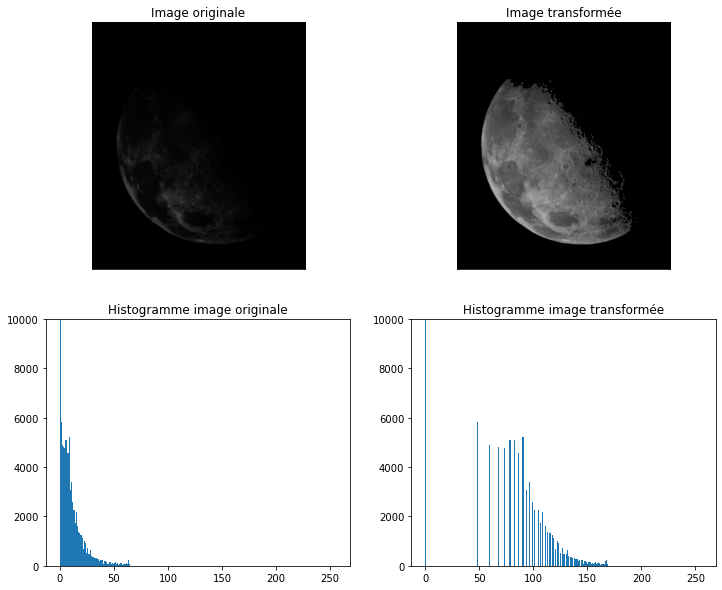

In [83]:
# Gamma
plotGraphsHist(imageOrig, gammaOp(imageOrig, 0.3))

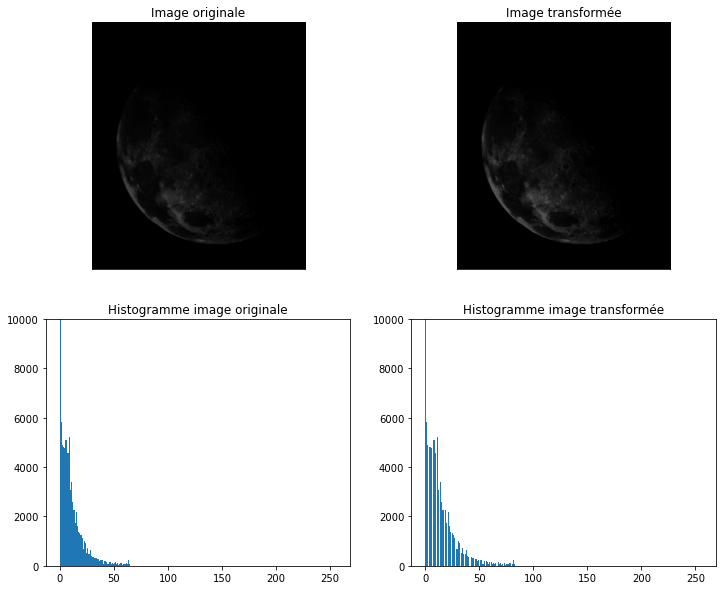

In [84]:
# Logarithme
plotGraphsHist(imageOrig, logarithmeOp(imageOrig))

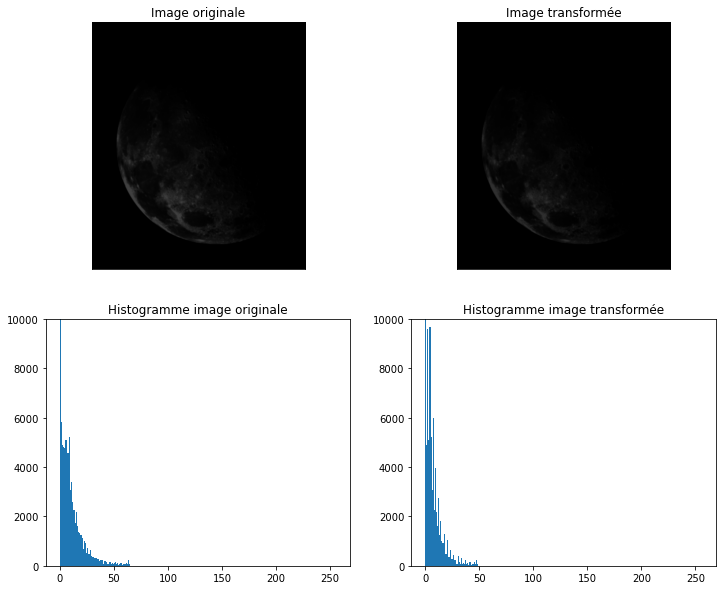

In [85]:
# Exponentielle
plotGraphsHist(imageOrig, exponentielleOp(imageOrig))

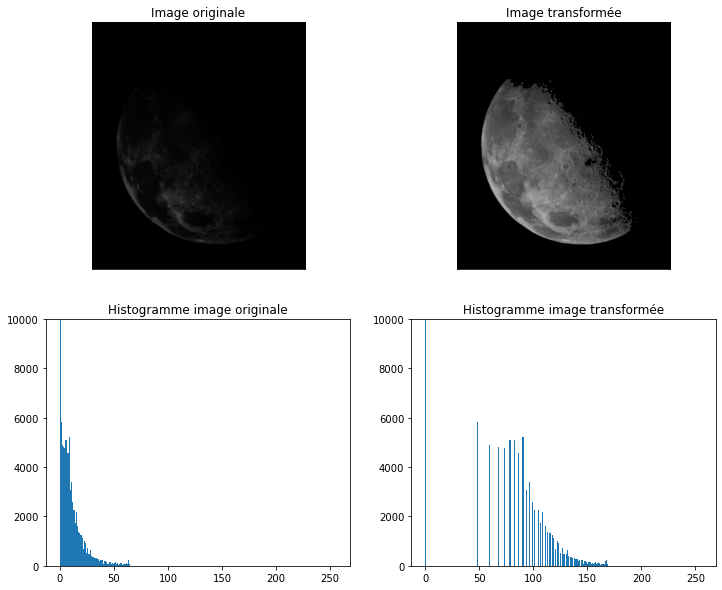

In [86]:
# Transformation globale #1
imageFin = gammaOp(imageOrig, 0.3)
imagePart1 = imageFin
plotGraphsHist(imageOrig, imageFin)

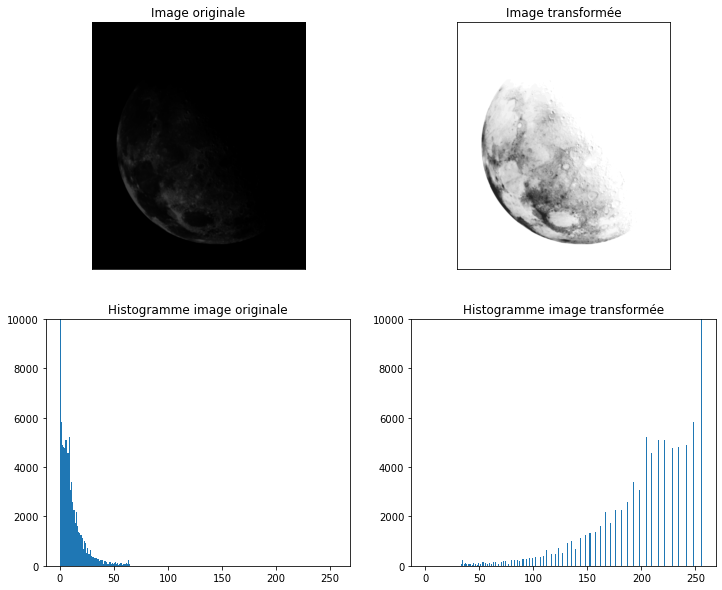

In [87]:
# Transformation globale #2
imageFin = inversionOp(imageOrig)
imageFin = gammaOp(imageFin, 7)
plotGraphsHist(imageOrig, imageFin)

<div class="alert alert-block alert-success"> 
On a testé des combinaisons des différentes transformations, mais une simple transformation gamma semble donner un très bon résultat avec une valeur de gamma de 0.3. Une autre transformation qui donne un très bon contraste est une inversion suivie d'une transformation gamma (gamma = 7). Toutefois, cette transformation fait perdre l'aspect visuel original de l'image. C'est donc la première transformation qui a été conservée pour la suite.

### 3.2. Affinage de l’image (2 pts)
<div class="alert alert-block alert-warning">


Appliquez à l’image obtenue à la question précédente un rehaussement par masquage flou
généralisé (Unsharp Filter / Masking en anglais). Ce filtre de convolution est défini par

<center> 𝐺 = 𝐹 + 𝑎 [ 𝐹 − ℎ<sub>𝑏</sub> ∗ 𝐹 ] = 𝐹 + 𝑎 [ 𝐹 − 𝐹′ ] </center>

où F est l’image originale, G est l’image rehaussée, hb est un noyau de convolution agissant
comme un filtre passe-bas, * est un produit de convolution, a est le coefficient de
rehaussement et b contrôle la taille du filtre adoucisseur. Utilisez le filtre par moyennage
pondéré de type Gaussien développé à la question précédente pour calculer l’image floue
𝐹′ = ℎ<sub>𝑏</sub> ∗ 𝐹.

Faites varier la taille du filtre adoucisseur et le coefficient de rehaussement. Qu’observezvous ? Décrivez l’effet de ces paramètres sur l’image rehaussée.
</div>

In [96]:
def affinage(a, filter_size):
    imageFloue = cv2.GaussianBlur(imagePart1, ksize=filter_size, sigmaX=0).squeeze()
    image = imagePart1 + a * (imagePart1 - imageFloue)

    image[image<0] = 0.0   # Clip valeurs <0 à 0.0
    imagePart2 = image
    plotGraphs(imagePart1, imagePart2)

    # Graphs optionnels pour visualiser
    if True:
        figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 10))
        ax1.imshow(imageFloue, cmap="gray", vmin=0, vmax=1)
        ax1.set_title("Image floue")
        ax2.imshow(a*(imagePart1 - imageFloue), cmap="gray", vmin=0, vmax=1)
        ax2.set_title("Masque des contours")
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)
        
    return imagePart2

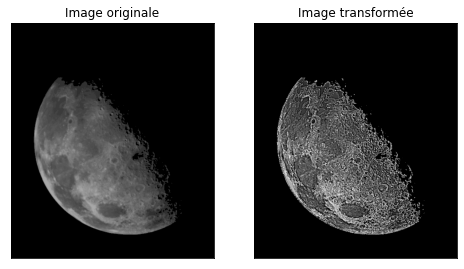

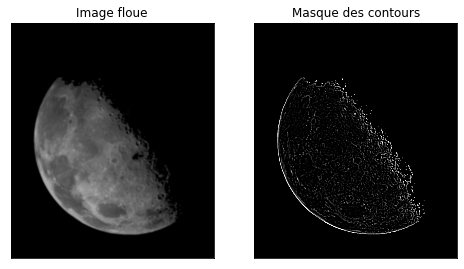

In [97]:
# Valeur de "a" trop grande
image = affinage(20, (5,5))

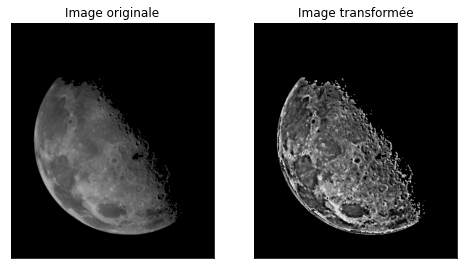

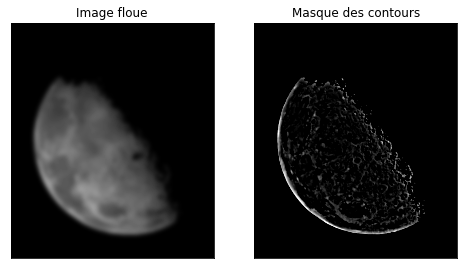

In [98]:
# Taille du filtre trop grande
image = affinage(4, (31,31))

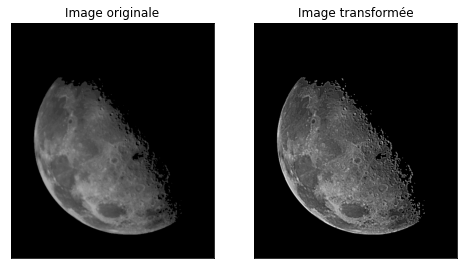

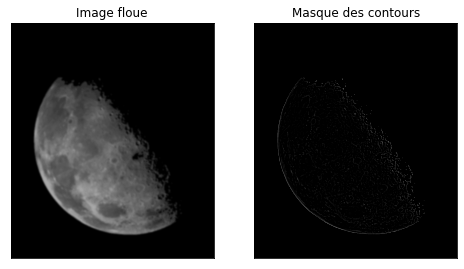

In [99]:
# Transformation
imagePart2 = affinage(3, (7,7))

<div class="alert alert-block alert-success"> 
L'opération de soustraction entre l'image originale et l'image floue crée un masque des contours. Le paramètre "a" représente donc à quel point on additionne une valeur élevée de contour à l'image originale. Plus on augmente "a", plus les contours ont une intensité, et donc un contraste, élevés. Par contre, si "a" est trop élevé, on amplifie également ce qui se trouve juste à côté des contours, ce qui élargie les contours. De plus, une trop grande valeur de "a" peut rendre les contours trop lumineux et ainsi affecter l'aspect visuel de l'image. Lorsqu'on augmente la taille du filtre, on augmente le nombre de pixels pris en compte dans le calcul de l'image floue, ce qui augmente l'adoucissement des contours dans l'image floue. Si l'image floue est trop floue, on perd le rehaussement des contours du masque. Ainsi, l'image transformée aura contours rehaussés, mais beaucoup trop imprécis et élargis. On a choisit un coefficient de rehaussement de 3 et un filtre de taille (7,7).
 

### 3.3. Égalisation d’histogramme (2 pts)
<div class="alert alert-block alert-warning">


Appliquez une égalisation d’histogramme à une image visuellement satisfaisante obtenue
à la question précédente. Qu’observez-vous ? Expliquez. Comparez au résultat obtenu si
vous appliquez l’égalisation d’histogramme à l’image de la Lune originale sans transformer
son intensité et sans la rehausser par masquage flou. Pourquoi les résultats sont-ils
différents ?
     Vous pouvez utiliser la fonction <code>equalize_histogram(img)</code> et <code>plt.hist</code> de matplotlib.
    
</div>

In [100]:
def equalize_histogram(img):
    # Normaliser l'image de 0 à 255
    img = ((img - img.min()) / (img.max() - img.min()) * 255).astype('uint8')
    hist, bins = np.histogram(img, 256, [0,256])
    T = np.cumsum(hist) # Somme cumulée
    T = (T - T.min()) / (T.max() - T.min()) # Normalisation entre 0 et 1
    return T[img]


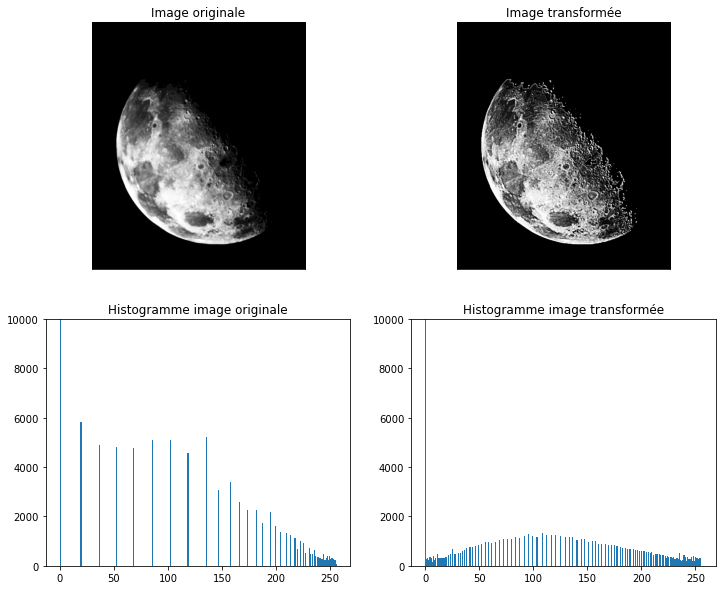

In [101]:
imageOrigEq = equalize_histogram(imageOrig)
imagePart3 = equalize_histogram(imagePart2)

plotGraphsHist(imageOrigEq, imagePart3)

<div class="alert alert-block alert-success"> 
On remarque que l'image originale égalisée est beaucoup plus floue. L'image transformée est beaucoup mieux définie. On voit clairement les détails et le contraste est bon. Si on compare les 2 histogrammes, on voit que l'histogramme de l'image transformée est très plat et très bien distribué sur toute la plage d'intensité. L'image transformée sans égalisation avait très peu de pixels de haute intensité. L'égalisation tire profit de toute la plage dynamique. Dans le cas de l'image originale égalisée, la distribution sur la plage d'intensité est bien moins uniforme et le nombre de pixels par bin n'est également pas très uniforme. Par contre, on perd l'aspect visuel de l'image originale dans les 2 cas parce que l'image est beaucoup trop lumineuse. Les résultats des deux histogrammes sont différents parce que l'algorithme d'égalisation est fortement dépendant de la distribution initiale.